In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

In [3]:
train_df= pd.read_csv("train.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df=pd.read_csv("test.csv")

Text(0, 0.5, 'number of passengers')

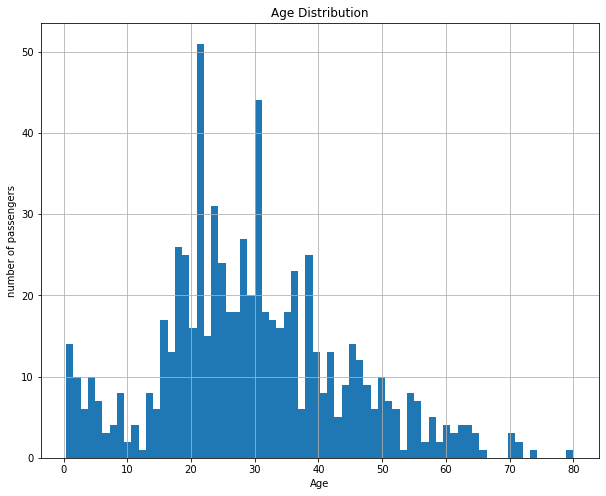

In [7]:
plt.figure(figsize=(10,8))
train_df['Age'].hist(bins=70)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("number of passengers")

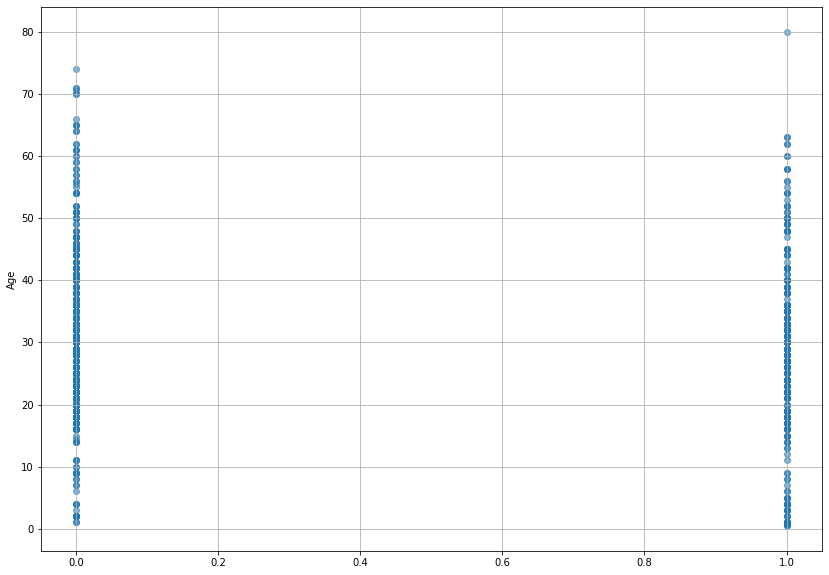

In [8]:
plt.figure(figsize=(14,10))
plt.scatter(train_df.Survived,train_df.Age,alpha=.55)
plt.ylabel('Age')
plt.grid()

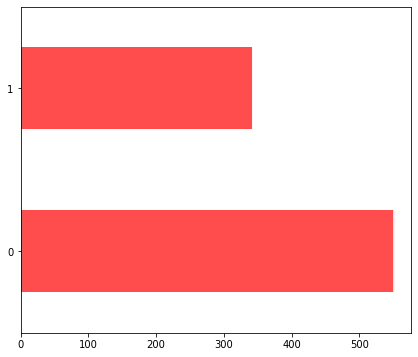

In [9]:
plt.figure(figsize=(7,6))
train_df.Survived.value_counts().plot(kind='barh',color="red",alpha=.70)


In [10]:
Pclass=train_df['Pclass'] 
unique=list(set(Pclass))
unique

[1, 2, 3]

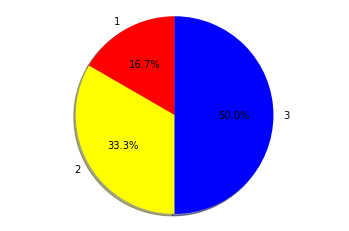

In [11]:
labels = '1', '2', '3'
sizes = unique
colors = ['red', 'yellow','blue']
explode = (0, 0, 0) 

plt.pie(sizes, labels=labels, colors=colors, explode=explode, 
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

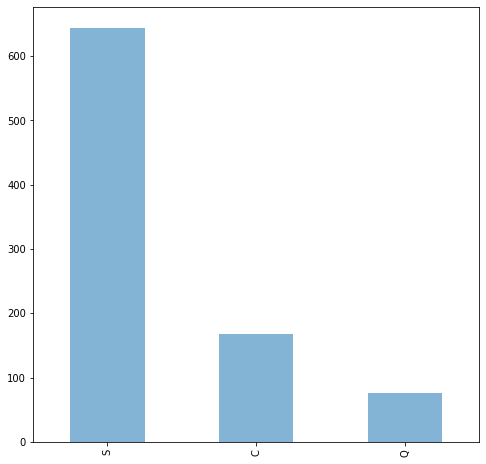

In [12]:
plt.figure(figsize=(8,8))
train_df.Embarked.value_counts().plot(kind='bar',alpha=.55)

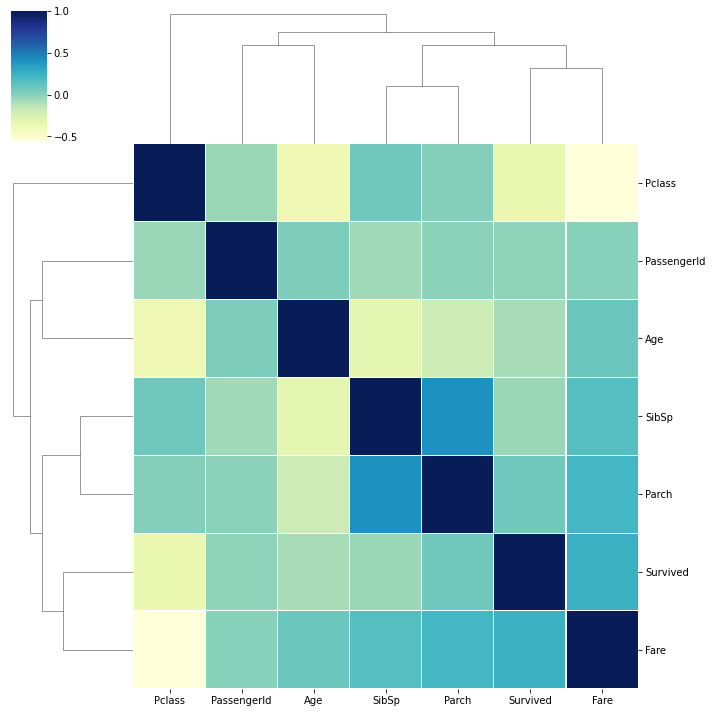

In [13]:
from scipy.stats import norm 
corrmat = train_df.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 

cg

In [29]:
def load_titanic_train_file():
    titanic_train_df=pd.read_csv("train.csv")
    cols=['Pclass','Sex','Age','Fare']
    titanic_train_df['Sex']= titanic_train_df['Sex'].apply(lambda sex:1 if sex=='male' else 0)
    titanic_train_df['Age']=titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean())
    titanic_train_df['Fare']=titanic_train_df['Fare'].fillna(titanic_train_df['Fare'].mean())
    titanic_train_df['Pclass']=titanic_train_df['Pclass'].values
    survived=titanic_train_df['Survived'].values
    data =titanic_train_df[cols].values
    return survived, data

In [23]:
def load_titanic_test_file():
    titanic_test_df=pd.read_csv("test.csv")
    cols=['Pclass','Sex','Age','Fare']
    titanic_test_df['Sex']= titanic_test_df['Sex'].apply(lambda sex:1 if sex=='male' else 0)
    titanic_test_df['Age']=titanic_test_df['Age'].fillna(titanic_test_df['Age'].mean())
    titanic_test_df['Fare']=titanic_test_df['Fare'].fillna(titanic_test_df['Fare'].mean())
    titanic_test_df['Pclass']=titanic_test_df['Pclass'].values
    PassengerId=titanic_test_df['PassengerId'].values
    data =titanic_test_df[cols].values
    return data

In [30]:
survived, data_train= load_titanic_train_file()
data_test= load_titanic_test_file()

In [27]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [31]:
model.fit(data_train,survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predict=model.predict(data_test)
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
new_test_pred_set=[[1,1,22,8]]
model.predict(new_test_pred_set)

array([1])

In [34]:
import pickle as pkl

In [35]:
persist_model=pkl.dumps(model)

In [36]:
persist_model

b'\x80\x03csklearn.linear_model._logistic\nLogisticRegression\nq\x00)\x81q\x01}q\x02(X\x07\x00\x00\x00penaltyq\x03X\x02\x00\x00\x00l2q\x04X\x04\x00\x00\x00dualq\x05\x89X\x03\x00\x00\x00tolq\x06G?\x1a6\xe2\xeb\x1cC-X\x01\x00\x00\x00Cq\x07G?\xf0\x00\x00\x00\x00\x00\x00X\r\x00\x00\x00fit_interceptq\x08\x88X\x11\x00\x00\x00intercept_scalingq\tK\x01X\x0c\x00\x00\x00class_weightq\nNX\x0c\x00\x00\x00random_stateq\x0bNX\x06\x00\x00\x00solverq\x0cX\x05\x00\x00\x00lbfgsq\rX\x08\x00\x00\x00max_iterq\x0eKdX\x0b\x00\x00\x00multi_classq\x0fX\x04\x00\x00\x00autoq\x10X\x07\x00\x00\x00verboseq\x11K\x00X\n\x00\x00\x00warm_startq\x12\x89X\x06\x00\x00\x00n_jobsq\x13NX\x08\x00\x00\x00l1_ratioq\x14NX\x08\x00\x00\x00classes_q\x15cnumpy.core.multiarray\n_reconstruct\nq\x16cnumpy\nndarray\nq\x17K\x00\x85q\x18C\x01bq\x19\x87q\x1aRq\x1b(K\x01K\x02\x85q\x1ccnumpy\ndtype\nq\x1dX\x02\x00\x00\x00i8q\x1e\x89\x88\x87q\x1fRq (K\x03X\x01\x00\x00\x00<q!NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq"b\x89C\x10\x00\x00\x00\x

In [37]:
from sklearn.externals import joblib
joblib.dump(model,'reg_model.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['reg_model.pkl']

In [38]:
new_model=joblib.load("reg_model.pkl")
new_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
new_model.predict(new_test_pred_set)

array([1])

In [40]:
predict1=pd.DataFrame(predict)
predict1.head()

,0
0,0
1,0
2,0
3,0
4,1


In [41]:
passenger_ID=pd.DataFrame(test_df['PassengerId'])
passenger_ID.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [42]:
test_df['Survived'] = predict1

In [43]:
result = test_df.drop(test_df.columns[[1,2, 3, 4,5,6,7,8,9,10]], axis=1)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [44]:
result.index

RangeIndex(start=0, stop=418, step=1)

In [45]:
result.index +=1
result.index

RangeIndex(start=1, stop=419, step=1)